#Context
Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

Content
The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single data-set. On initial visual inspection of the data showed some missing values. As the data-sets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo, Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model data-set. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

Acknowledgements
The data was collected from WHO and United Nations website with the help of Deeksha Russell and Duan Wang.

Inspiration
The data-set aims to answer the following key questions:

Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?
Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
How does Infant and Adult mortality rates affect life expectancy?
Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
What is the impact of schooling on the lifespan of humans?
Does Life Expectancy have positive or negative relationship with drinking alcohol?
Do densely populated countries tend to have lower life expectancy?
What is the impact of Immunization coverage on life Expectancy?
________________________________________________________________________________


Life expectancy:Life Expectancy in age

Adult Mortality:Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

infant deaths:Number of Infant Deaths per 1000 population

Alcohol:Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

percentage expenditure:Expenditure on health as a percentage of Gross Domestic Product per capita(%)

Hepatitis B:Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

Measles:Measles - number of reported cases per 1000 population

BMI:Average Body Mass Index of entire population

Polio:Polio (Pol3) immunization coverage among 1-year-olds (%)

Total expenditure:General government expenditure on health as a percentage of total government expenditure (%)

Diphtheria :Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
HIV/AIDS:Deaths per 1 000 live births HIV/AIDS (0-4 years)

GDP:Gross Domestic Product per capita (in USD)

Population:Population of the country

thinness 1-19 years:Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

thinness 5-9 years:Prevalence of thinness among children for Age 5 to 9(%)

Income composition of resources:Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

Schooling:Number of years of Schooling(years)



In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score , confusion_matrix , ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split , cross_validate , GridSearchCV ,StratifiedKFold
from sklearn.pipeline import Pipeline





In [2]:
df = pd.read_csv('Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df[df['Life expectancy '].isna()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


In [8]:
df = df.dropna(subset=['Life expectancy '])


In [9]:
df[df['Life expectancy '].isna()]



,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling


In [10]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [11]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [12]:
df['Alcohol'].mean()

4.614855575868373

In [13]:
df['Alcohol'].median()

3.77

In [14]:
df['Alcohol'].mode()

0    0.01
Name: Alcohol, dtype: float64

In [15]:
df['Alcohol'] = df['Alcohol'].fillna(df['Alcohol'].median())


<ipython-input-15-102789722e3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Alcohol'] = df['Alcohol'].fillna(df['Alcohol'].median())


In [16]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [17]:
df['Alcohol'].value_counts()

0.01    280
3.77    196
0.03     15
0.04     13
0.02     12
       ... 
3.71      1
7.29      1
7.09      1
4.33      1
4.57      1
Name: Alcohol, Length: 1076, dtype: int64

In [18]:
df[df['Polio'].isna()]


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1742,Montenegro,2005,Developing,73.6,133.0,0,3.77,527.307672,NaN,0,...,NaN,8.46,NaN,0.1,3674.617924,614261.0,2.3,2.3,0.746,12.8
1743,Montenegro,2004,Developing,73.5,134.0,0,0.01,57.121901,NaN,0,...,NaN,8.45,NaN,0.1,338.199535,613353.0,2.3,2.4,0.740,12.6
1744,Montenegro,2003,Developing,73.5,134.0,0,0.01,495.078296,NaN,0,...,NaN,8.91,NaN,0.1,2789.173500,612267.0,2.4,2.4,0.000,0.0
1745,Montenegro,2002,Developing,73.4,136.0,0,0.01,36.480240,NaN,0,...,NaN,8.33,NaN,0.1,216.243274,69828.0,2.5,2.5,0.000,0.0
1746,Montenegro,2001,Developing,73.3,136.0,0,0.01,33.669814,NaN,0,...,NaN,8.23,NaN,0.1,199.583957,67389.0,2.5,2.6,0.000,0.0
1747,Montenegro,2000,Developing,73.0,144.0,0,0.01,274.547260,NaN,0,...,NaN,7.32,NaN,0.1,1627.428930,6495.0,2.6,2.7,0.000,0.0
2414,South Sudan,2010,Developing,55.0,359.0,27,3.77,0.000000,NaN,0,...,NaN,NaN,NaN,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0
2415,South Sudan,2009,Developing,54.3,369.0,27,3.77,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,1264.789980,967667.0,NaN,NaN,0.000,0.0
2416,South Sudan,2008,Developing,53.6,377.0,27,3.77,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,1678.711862,9263136.0,NaN,NaN,0.000,0.0
2417,South Sudan,2007,Developing,53.1,381.0,27,3.77,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,NaN,88568.0,NaN,NaN,0.000,0.0


In [19]:
df = df.dropna(subset=['Polio'])

In [20]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        534
Measles                              0
 BMI                                21
under-five deaths                    0
Polio                                0
Total expenditure                  215
Diphtheria                           0
 HIV/AIDS                            0
GDP                                435
Population                         644
 thinness  1-19 years               21
 thinness 5-9 years                 21
Income composition of resources    160
Schooling                          160
dtype: int64

In [21]:
df[df[' thinness  1-19 years'].isna()]


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2409,South Sudan,2015,Developing,57.3,332.0,26,3.77,0.000000,31.0,878,...,41.0,NaN,31.0,3.4,758.725782,11882136.0,NaN,NaN,0.421,4.9
2410,South Sudan,2014,Developing,56.6,343.0,26,3.77,46.074469,NaN,441,...,44.0,2.74,39.0,3.5,1151.861715,1153971.0,NaN,NaN,0.421,4.9
2411,South Sudan,2013,Developing,56.4,345.0,26,3.77,47.444530,NaN,525,...,5.0,2.62,45.0,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9
2412,South Sudan,2012,Developing,56.0,347.0,26,3.77,38.338232,NaN,1952,...,64.0,2.77,59.0,3.8,958.455810,1818258.0,NaN,NaN,0.419,4.9
2413,South Sudan,2011,Developing,55.4,355.0,27,3.77,0.000000,NaN,1256,...,66.0,NaN,61.0,3.9,176.971300,1448857.0,NaN,NaN,0.429,4.9
2457,Sudan,2015,Developing,64.1,225.0,58,3.77,0.000000,93.0,3585,...,93.0,NaN,93.0,0.3,2513.884661,3864783.0,NaN,NaN,0.488,7.2
2458,Sudan,2014,Developing,63.8,229.0,59,0.01,253.608651,94.0,676,...,94.0,8.43,94.0,0.3,2176.898290,37737913.0,NaN,NaN,0.485,7.2
2459,Sudan,2013,Developing,63.5,232.0,60,0.01,227.835321,93.0,2813,...,93.0,8.42,93.0,0.3,1955.667990,36849918.0,NaN,NaN,0.478,7.0
2460,Sudan,2012,Developing,63.2,235.0,61,0.01,220.522192,92.0,8523,...,92.0,8.20,92.0,0.3,1892.894352,3599192.0,NaN,NaN,0.468,6.8
2461,Sudan,2011,Developing,62.7,241.0,61,2.12,196.689215,93.0,5616,...,93.0,8.30,93.0,0.3,1666.857757,35167314.0,NaN,NaN,0.463,7.0


In [22]:
df = df.dropna(subset=[' thinness  1-19 years'])

In [23]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        525
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                  212
Diphtheria                           0
 HIV/AIDS                            0
GDP                                435
Population                         644
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources    160
Schooling                          160
dtype: int64

In [24]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [25]:
df.drop('Schooling', axis=1, inplace=True)

In [26]:
df.drop('Income composition of resources', axis=1, inplace=True)

In [27]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7


In [28]:
df.isna().sum()

Country                     0
Year                        0
Status                      0
Life expectancy             0
Adult Mortality             0
infant deaths               0
Alcohol                     0
percentage expenditure      0
Hepatitis B               525
Measles                     0
 BMI                        0
under-five deaths           0
Polio                       0
Total expenditure         212
Diphtheria                  0
 HIV/AIDS                   0
GDP                       435
Population                644
 thinness  1-19 years       0
 thinness 5-9 years         0
dtype: int64

In [29]:
df['GDP'].value_counts()

584.259210     1
124.992617     1
1847.198490    1
1792.384500    1
1682.957924    1
              ..
763.662230     1
194.274600     1
8352.817110    1
727.777345     1
547.358878     1
Name: GDP, Length: 2453, dtype: int64

In [30]:
df.drop('Population', axis=1, inplace=True)

In [31]:
df.drop('GDP', axis=1, inplace=True)

In [32]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,9.4,9.4
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,9.8,9.9
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,1.2,1.3
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,1.6,1.7


In [33]:
df.isna().sum()

Country                     0
Year                        0
Status                      0
Life expectancy             0
Adult Mortality             0
infant deaths               0
Alcohol                     0
percentage expenditure      0
Hepatitis B               525
Measles                     0
 BMI                        0
under-five deaths           0
Polio                       0
Total expenditure         212
Diphtheria                  0
 HIV/AIDS                   0
 thinness  1-19 years       0
 thinness 5-9 years         0
dtype: int64

In [34]:
df['Hepatitis B'].value_counts()

99.0    237
98.0    209
96.0    166
97.0    154
95.0    149
       ... 
16.0      1
1.0       1
15.0      1
11.0      1
19.0      1
Name: Hepatitis B, Length: 87, dtype: int64

In [35]:
df['Hepatitis B'].mean()

81.02200592467203

In [36]:
df['Hepatitis B'] = df['Hepatitis B'].fillna(df['Hepatitis B'].mean())


In [37]:
df.isna().sum()

Country                     0
Year                        0
Status                      0
Life expectancy             0
Adult Mortality             0
infant deaths               0
Alcohol                     0
percentage expenditure      0
Hepatitis B                 0
Measles                     0
 BMI                        0
under-five deaths           0
Polio                       0
Total expenditure         212
Diphtheria                  0
 HIV/AIDS                   0
 thinness  1-19 years       0
 thinness 5-9 years         0
dtype: int64

In [38]:
df.drop('Total expenditure', axis=1, inplace=True)

In [39]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,65.0,0.1,17.2,17.3
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,62.0,0.1,17.5,17.5
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,64.0,0.1,17.7,17.7
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,67.0,0.1,17.9,18.0
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,68.0,0.1,18.2,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,65.0,33.6,9.4,9.4
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,68.0,36.7,9.8,9.9
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,71.0,39.8,1.2,1.3
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,75.0,42.1,1.6,1.7


In [40]:
df[df['Life expectancy ']==0]



,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years


In [41]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,2007.515235,69.349377,163.357341,30.314751,4.590880,749.475611,81.022006,2442.514543,38.221087,41.985803,82.672091,82.437673,1.749792,4.850589,4.881337
std,4.606938,9.495441,124.018934,118.891670,3.934282,2003.090073,22.591590,11561.322467,19.962630,161.743345,23.333655,23.648907,5.116551,4.421403,4.510414
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,0.100000,0.100000,0.100000
25%,2004.000000,63.475000,73.000000,0.000000,1.107500,5.049462,81.022006,0.000000,19.300000,0.000000,78.000000,78.000000,0.100000,1.600000,1.500000
50%,2008.000000,72.200000,143.000000,3.000000,3.770000,67.687008,87.000000,17.000000,43.250000,4.000000,93.000000,93.000000,0.100000,3.350000,3.400000
75%,2012.000000,75.800000,225.000000,21.000000,7.490000,454.422430,96.000000,352.250000,56.100000,26.000000,97.000000,97.000000,0.800000,7.200000,7.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,99.000000,50.600000,27.700000,28.600000


In [42]:
df[df['percentage expenditure']==0]


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years
32,Algeria,2015,Developing,75.6,19.0,21,3.77,0.0,95.0,63,59.5,24,95.0,95.0,0.1,6.0,5.8
48,Angola,2015,Developing,52.4,335.0,66,3.77,0.0,64.0,118,23.3,98,7.0,64.0,1.9,8.3,8.2
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,3.77,0.0,99.0,0,47.7,0,86.0,99.0,0.2,3.3,3.3
80,Argentina,2015,Developing,76.3,116.0,8,3.77,0.0,94.0,0,62.8,9,93.0,94.0,0.1,1.0,0.9
96,Armenia,2015,Developing,74.8,118.0,1,3.77,0.0,94.0,33,54.9,1,96.0,94.0,0.1,2.1,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,27.1,42,67.0,65.0,33.6,9.4,9.4
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,26.7,41,7.0,68.0,36.7,9.8,9.9
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,26.3,40,73.0,71.0,39.8,1.2,1.3
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,25.9,39,76.0,75.0,42.1,1.6,1.7


In [43]:
df.drop(df[df['infant deaths'] >= 160].index, inplace=True)

In [44]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years
count,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000,2785.000000
mean,2007.550449,69.617199,162.351885,13.717056,4.663759,775.744065,81.679682,1241.916338,39.011957,19.355117,83.360144,83.233752,1.759282,4.577774,4.606176
std,4.607713,9.449131,124.123460,23.587428,3.944453,2035.028958,22.142788,5215.656871,19.854185,34.143859,22.997609,23.120832,5.197756,3.930968,3.988683
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,0.100000,0.100000,0.100000
25%,2004.000000,63.900000,73.000000,0.000000,1.160000,5.379606,81.022006,0.000000,21.100000,0.000000,81.000000,81.000000,0.100000,1.500000,1.500000
50%,2008.000000,72.400000,141.000000,3.000000,3.770000,72.850237,88.000000,13.000000,44.700000,3.000000,93.000000,93.000000,0.100000,3.300000,3.300000
75%,2012.000000,76.000000,224.000000,17.000000,7.550000,473.123812,96.000000,257.000000,56.400000,21.000000,97.000000,97.000000,0.700000,7.000000,7.000000
max,2015.000000,89.000000,723.000000,159.000000,17.870000,19479.911610,99.000000,118712.000000,77.600000,231.000000,99.000000,99.000000,50.600000,19.900000,19.900000


In [45]:
df.drop(df[df['Measles '] >= 5000].index, inplace=True)
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,65.0,0.1,17.2,17.3
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,62.0,0.1,17.5,17.5
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,64.0,0.1,17.7,17.7
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,67.0,0.1,17.9,18.0
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,68.0,0.1,18.2,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,65.0,33.6,9.4,9.4
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,68.0,36.7,9.8,9.9
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,71.0,39.8,1.2,1.3
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,75.0,42.1,1.6,1.7


In [46]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years
count,2610.000000,2610.000000,2610.000000,2610.000000,2610.00000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000,2610.000000
mean,2007.729119,70.036054,159.509962,11.424904,4.76146,800.675037,82.258465,287.878161,39.873563,16.013410,84.295402,84.063602,1.683448,4.450383,4.453831
std,4.537459,9.231815,122.079397,20.150885,3.95469,2075.565887,21.961670,722.200116,19.769361,29.314858,22.301372,22.587994,5.208371,3.848203,3.895629
min,2000.000000,36.300000,1.000000,0.000000,0.01000,0.000000,2.000000,0.000000,1.400000,0.000000,3.000000,2.000000,0.100000,0.100000,0.100000
25%,2004.000000,64.700000,73.000000,0.000000,1.23000,5.830944,81.022006,0.000000,21.900000,0.000000,82.250000,82.000000,0.100000,1.500000,1.500000
50%,2008.000000,72.700000,138.000000,2.000000,3.77000,78.962833,89.000000,8.000000,45.850000,3.000000,94.000000,93.000000,0.100000,3.200000,3.200000
75%,2012.000000,76.100000,219.000000,12.000000,7.64750,503.469045,96.000000,143.000000,56.800000,15.000000,97.000000,97.000000,0.600000,6.800000,6.800000
max,2015.000000,89.000000,723.000000,156.000000,17.87000,19479.911610,99.000000,4929.000000,77.600000,231.000000,99.000000,99.000000,50.600000,19.900000,19.900000


In [47]:
df['percentage expenditure'].value_counts()

0.000000       537
71.279624        1
63.577052        1
321.613259       1
334.817425       1
              ... 
4508.806185      1
4816.589613      1
524.777523       1
6147.132300      1
8.717409         1
Name: percentage expenditure, Length: 2074, dtype: int64

In [48]:
df.drop('percentage expenditure', axis=1, inplace=True)

In [49]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,65.0,1154,19.1,83,6.0,65.0,0.1,17.2,17.3
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,62.0,492,18.6,86,58.0,62.0,0.1,17.5,17.5
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,64.0,430,18.1,89,62.0,64.0,0.1,17.7,17.7
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,67.0,2787,17.6,93,67.0,67.0,0.1,17.9,18.0
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,68.0,3013,17.2,97,68.0,68.0,0.1,18.2,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,68.0,31,27.1,42,67.0,65.0,33.6,9.4,9.4
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,7.0,998,26.7,41,7.0,68.0,36.7,9.8,9.9
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,73.0,304,26.3,40,73.0,71.0,39.8,1.2,1.3
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,76.0,529,25.9,39,76.0,75.0,42.1,1.6,1.7


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2610 entries, 0 to 2937
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                2610 non-null   object 
 1   Year                   2610 non-null   int64  
 2   Status                 2610 non-null   object 
 3   Life expectancy        2610 non-null   float64
 4   Adult Mortality        2610 non-null   float64
 5   infant deaths          2610 non-null   int64  
 6   Alcohol                2610 non-null   float64
 7   Hepatitis B            2610 non-null   float64
 8   Measles                2610 non-null   int64  
 9    BMI                   2610 non-null   float64
 10  under-five deaths      2610 non-null   int64  
 11  Polio                  2610 non-null   float64
 12  Diphtheria             2610 non-null   float64
 13   HIV/AIDS              2610 non-null   float64
 14   thinness  1-19 years  2610 non-null   float64
 15   thi

# What is the average life expectancy across all years and countries?



In [51]:
average_life_expectancy = df['Life expectancy '].mean()
print("Average Life Expectancy:", average_life_expectancy)


Average Life Expectancy: 70.03605363984674


#How has life expectancy changed over the years?



In [52]:
life_expectancy_by_year = df.groupby('Year')['Life expectancy '].mean()
print(life_expectancy_by_year)


Year
2000    68.680282
2001    69.046853
2002    68.746259
2003    68.174522
2004    68.377215
2005    68.669880
2006    69.214118
2007    69.502312
2008    69.690058
2009    70.392899
2010    70.728743
2011    71.178571
2012    71.372353
2013    71.734706
2014    72.144118
2015    72.128994
Name: Life expectancy , dtype: float64


#Which country has the highest life expectancy?

In [53]:
country_with_highest_expectancy = df.loc[df['Life expectancy '].idxmax()]['Country']
print("Country with the Highest Life Expectancy:", country_with_highest_expectancy)


Country with the Highest Life Expectancy: Belgium


#Which country has the lowest life expectancy?

In [54]:
country_with_lowest_expectancy = df.loc[df['Life expectancy '].idxmin()]['Country']
print("Country with the Lowest Life Expectancy:", country_with_lowest_expectancy)


Country with the Lowest Life Expectancy: Haiti


#What is the correlation between alcohol consumption and life expectancy?



In [55]:
correlation_alcohol_life = df['Alcohol'].corr(df['Life expectancy '])
print("Correlation between Alcohol and Life Expectancy:", correlation_alcohol_life)


Correlation between Alcohol and Life Expectancy: 0.3977942276455668


#What is the median BMI across different countries?



In [56]:
median_bmi_by_country = df.groupby('Country')[' BMI '].median()
print(median_bmi_by_country)


Country
Afghanistan                           15.95
Albania                               52.15
Algeria                               52.30
Angola                                18.50
Antigua and Barbuda                   42.90
                                      ...  
Venezuela (Bolivarian Republic of)    57.35
Viet Nam                              12.90
Yemen                                 36.05
Zambia                                19.20
Zimbabwe                              27.50
Name:  BMI , Length: 175, dtype: float64


#Top 10 median BMI values across different countries:



In [57]:
top_10_median_bmi_by_country = df.groupby('Country')[' BMI '].median().sort_values(ascending=False).head(10)
print(top_10_median_bmi_by_country)



Country
Kiribati                            73.75
Samoa                               70.55
Tonga                               70.45
Kuwait                              66.50
Malta                               66.35
United States of America            65.40
Qatar                               65.15
Micronesia (Federated States of)    64.95
New Zealand                         63.50
Canada                              62.75
Name:  BMI , dtype: float64


#Calculate the average number of under-five deaths by year.



In [58]:
avg_under_five_deaths_by_year = df.groupby('Year')['under-five deaths '].mean()
print(avg_under_five_deaths_by_year)


Year
2000    13.338028
2001    12.419580
2002    13.734694
2003    16.273885
2004    17.335443
2005    18.403614
2006    17.770588
2007    18.410405
2008    18.590643
2009    17.017751
2010    16.532934
2011    16.071429
2012    16.841176
2013    14.635294
2014    13.852941
2015    13.781065
Name: under-five deaths , dtype: float64


#Find the country with the lowest infant mortality rate.

In [59]:
country_with_lowest_infant_mortality = df.loc[df['infant deaths'].idxmin()]['Country']
print("Country with the Lowest Infant Mortality:", country_with_lowest_infant_mortality)


Country with the Lowest Infant Mortality: Albania


#Find the country with the Highest infant mortality rate.

In [60]:
country_with_highest_infant_mortality = df.loc[df['infant deaths'].idxmax()]['Country']
print("Country with the Highest Infant Mortality:", country_with_highest_infant_mortality)

Country with the Highest Infant Mortality: Ethiopia


#What is the maximum value of Diphtheria vaccination coverage?



In [61]:
max_diphtheria_coverage = df['Diphtheria '].max()
print("Maximum Diphtheria Vaccination Coverage:", max_diphtheria_coverage)


Maximum Diphtheria Vaccination Coverage: 99.0


#What is the Minimum value of Diphtheria vaccination coverage?



In [62]:
min_diphtheria_coverage = df['Diphtheria '].min()
print("Minimum Diphtheria Vaccination Coverage:", min_diphtheria_coverage)

Minimum Diphtheria Vaccination Coverage: 2.0


#Top 10 countries with the highest total number of measles cases:





In [63]:
top_10_countries_highest_measles = df.groupby('Country')['Measles '].sum().sort_values(ascending=False).head(10)
print(top_10_countries_highest_measles)


Country
Thailand              32299
Russian Federation    25863
Afghanistan           22502
Germany               17931
Cambodia              17856
Nepal                 17181
Congo                 16346
Angola                15768
Myanmar               14632
Uganda                14303
Name: Measles , dtype: int64


#Calculate the median adult mortality rate for each year.



In [64]:
median_adult_mortality_by_year = df.groupby('Year')['Adult Mortality'].median()
print(median_adult_mortality_by_year)


Year
2000    147.5
2001    147.0
2002    145.0
2003    142.0
2004    152.5
2005    137.0
2006    142.5
2007    133.0
2008    149.0
2009    142.0
2010    133.0
2011    137.0
2012    134.5
2013    132.0
2014    129.5
2015    133.0
Name: Adult Mortality, dtype: float64


#Calculate the average Hepatitis B vaccination coverage for each status (developed, developing).

In [65]:
avg_hepatitis_b_by_status = df.groupby('Status')['Hepatitis B'].mean()
print(avg_hepatitis_b_by_status)


Status
Developed     85.602555
Developing    81.467987
Name: Hepatitis B, dtype: float64


#How many countries have a life expectancy greater than 80 years?



In [66]:
countries_above_80_years = df[df['Life expectancy '] > 80]['Country'].nunique()
print("Number of Countries with Life Expectancy > 80 years:", countries_above_80_years)


Number of Countries with Life Expectancy > 80 years: 29


#Calculate the correlation matrix for all numeric columns.



In [67]:
correlation_matrix = df.corr()
print(correlation_matrix)

                           Year  Life expectancy   Adult Mortality  \
Year                   1.000000          0.137947        -0.079348   
Life expectancy        0.137947          1.000000        -0.711382   
Adult Mortality       -0.079348         -0.711382         1.000000   
infant deaths          0.008520         -0.494938         0.349880   
Alcohol               -0.107490          0.397794        -0.191197   
Hepatitis B            0.076714          0.177685        -0.134725   
Measles               -0.080814         -0.226400         0.155189   
 BMI                   0.069051          0.552461        -0.395789   
under-five deaths      0.000932         -0.538129         0.376895   
Polio                  0.060566          0.416715        -0.253567   
Diphtheria             0.102669          0.427461        -0.254113   
 HIV/AIDS             -0.133746         -0.562758         0.533753   
 thinness  1-19 years  0.003974         -0.511796         0.366047   
 thinness 5-9 years 

<ipython-input-67-becb50483c66>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


#Create a line chart to visualize the trend of life expectancy over the years.



Text(0, 0.5, 'Average Life Expectancy')

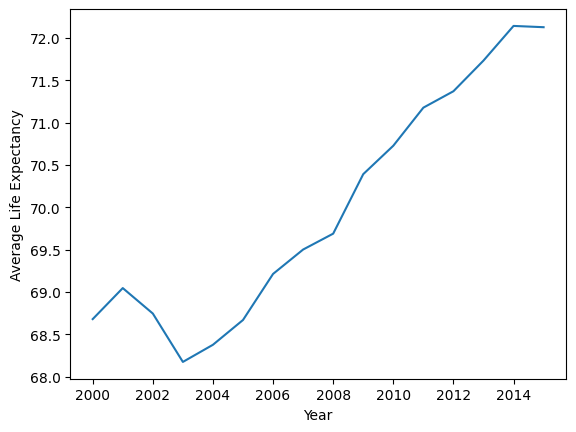

In [68]:
plt.plot(df.groupby('Year')['Life expectancy '].mean())
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')

#Generate a bar chart to compare the life expectancy of the top 10 countries.



<Axes: xlabel='Country'>

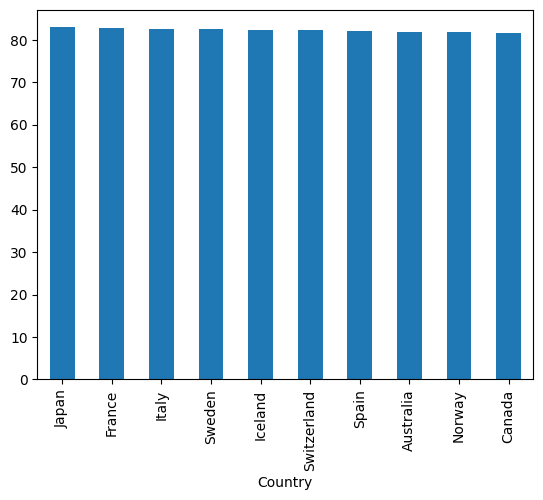

In [69]:
top_10_countries_life_expectancy = df.groupby('Country')['Life expectancy '].mean().nlargest(10)
top_10_countries_life_expectancy.plot(kind='bar')


#Generate a bar chart to compare the life expectancy of the less 10 countries.



<Axes: xlabel='Country'>

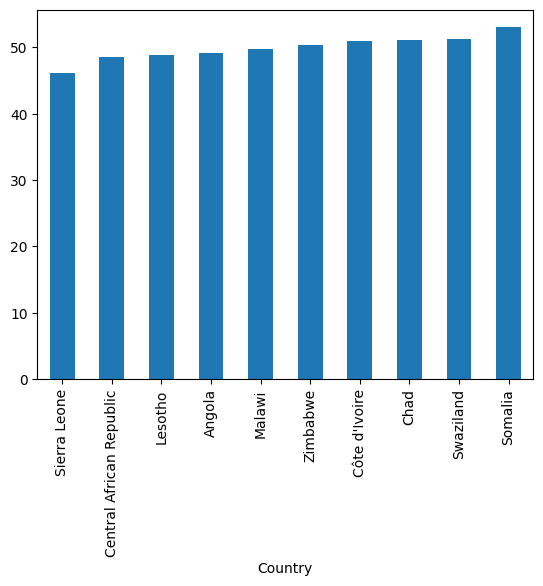

In [70]:
less_10_countries_life_expectancy = df.groupby('Country')['Life expectancy '].mean().nsmallest(10)
less_10_countries_life_expectancy.plot(kind='bar')


#Generate a bar chart to compare the BMI of the high 10 countries.


<Axes: xlabel='Country'>

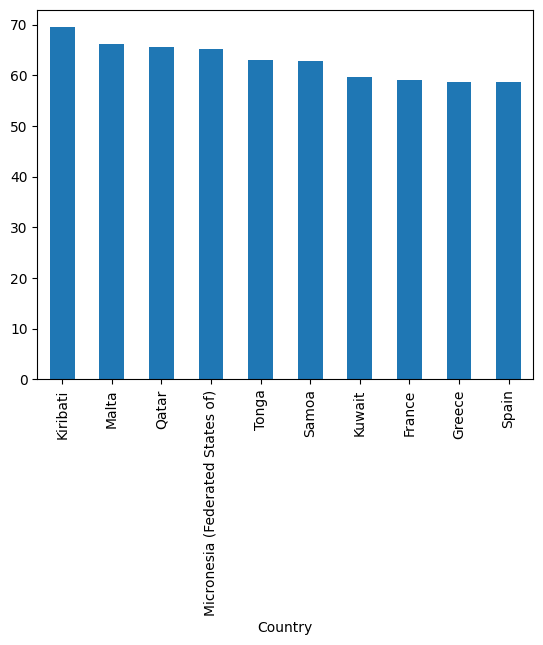

In [71]:
top_10_countries_life_expectancy = df.groupby('Country')[' BMI '].mean().nlargest(10)
top_10_countries_life_expectancy.plot(kind='bar')


#Generate a bar chart to compare the BMI of the less 10 countries.


<Axes: xlabel='Country'>

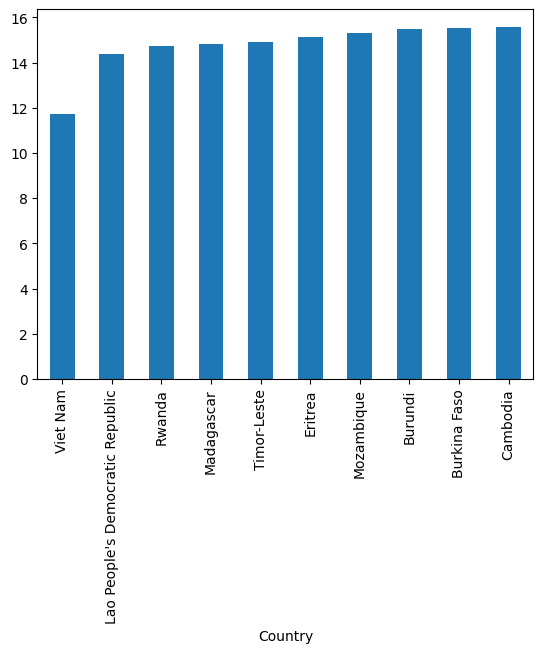

In [72]:
top_10_countries_life_expectancy = df.groupby('Country')[' BMI '].mean().nsmallest(10)
top_10_countries_life_expectancy.plot(kind='bar')


#Generate a bar chart to compare the Measles of the high 10 countries.


<Axes: xlabel='Country'>

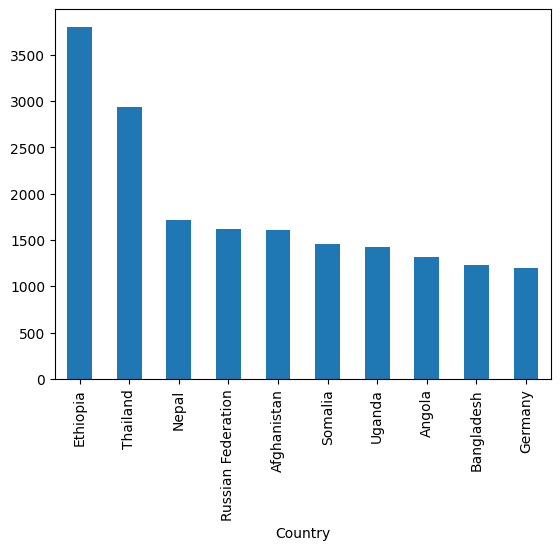

In [73]:
top_10_countries_life_expectancy = df.groupby('Country')['Measles '].mean().nlargest(10)
top_10_countries_life_expectancy.plot(kind='bar')


#Generate a bar chart to compare the Measles of the less 10 countries.


<Axes: xlabel='Country'>

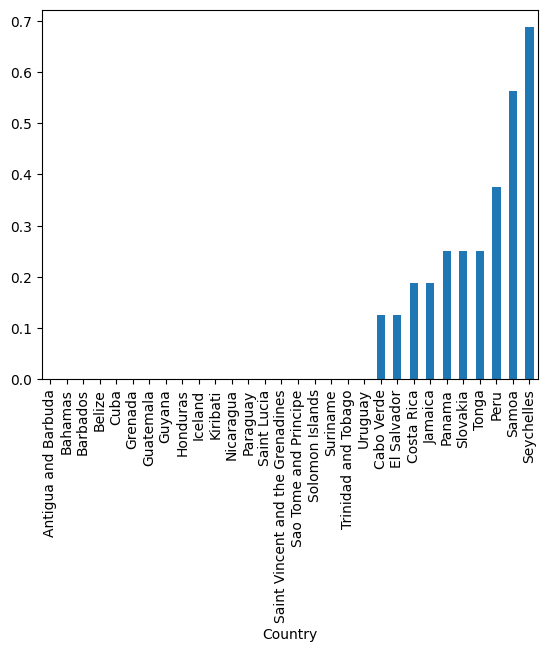

In [74]:
top_10_countries_life_expectancy = df.groupby('Country')['Measles '].mean().nsmallest(30)
top_10_countries_life_expectancy.plot(kind='bar')


#Generate a scatter plot between adult mortality and life expectancy.



<Axes: xlabel='Adult Mortality', ylabel='Life expectancy '>

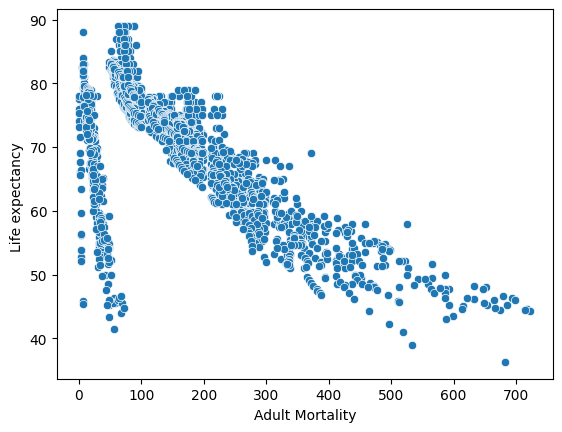

In [75]:
sns.scatterplot(x='Adult Mortality', y='Life expectancy ', data=df)


#Explore the relationship between measles cases and life expectancy using a scatter plot.

<Axes: xlabel='Measles ', ylabel='Life expectancy '>

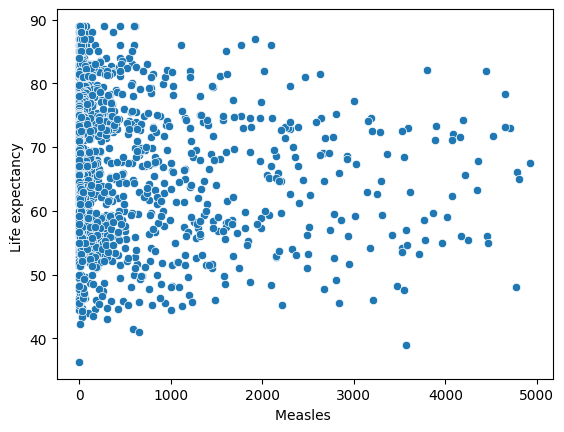

In [76]:
sns.scatterplot(x='Measles ', y='Life expectancy ', data=df)


#Create a pie chart to represent the distribution of countries by status.



<Axes: ylabel='Status'>

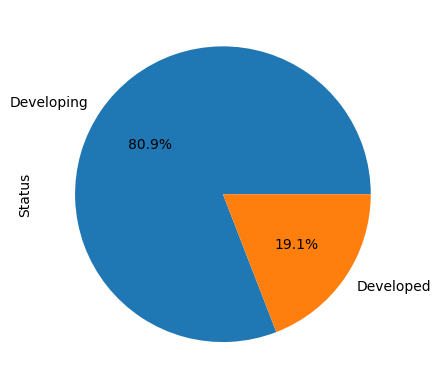

In [77]:
df['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%')


#Create a line chart to show the trend of under-five deaths over the years.



Text(0, 0.5, 'Total Under-Five Deaths')

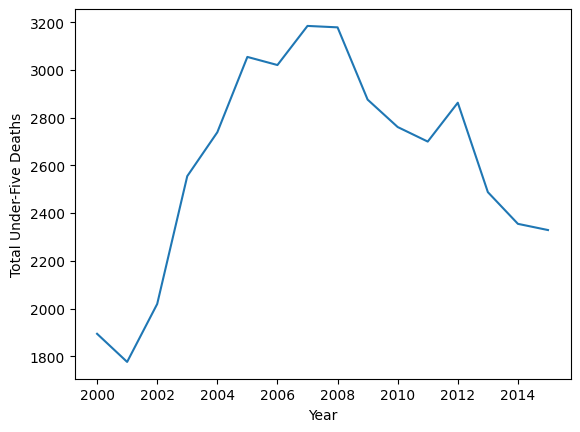

In [78]:
plt.plot(df.groupby('Year')['under-five deaths '].sum())
plt.xlabel('Year')
plt.ylabel('Total Under-Five Deaths')

#Generate a scatter plot between Diphtheria vaccination coverage and life expectancy.

<Axes: xlabel='Diphtheria ', ylabel='Life expectancy '>

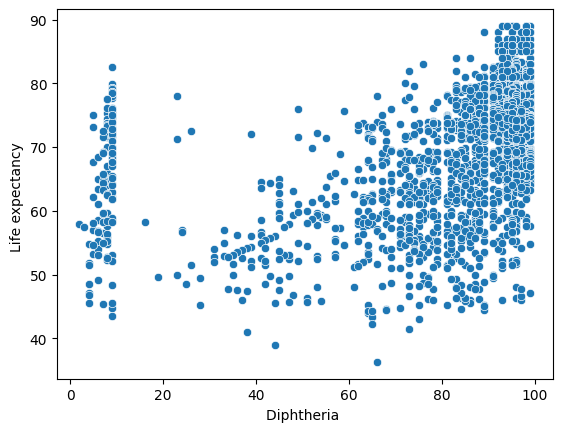

In [79]:
sns.scatterplot(x='Diphtheria ', y='Life expectancy ', data=df)


#Visualize the trend of thinness (5-9 years) over the years using a line chart.



Text(0, 0.5, 'Average Thinness (5-9 years)')

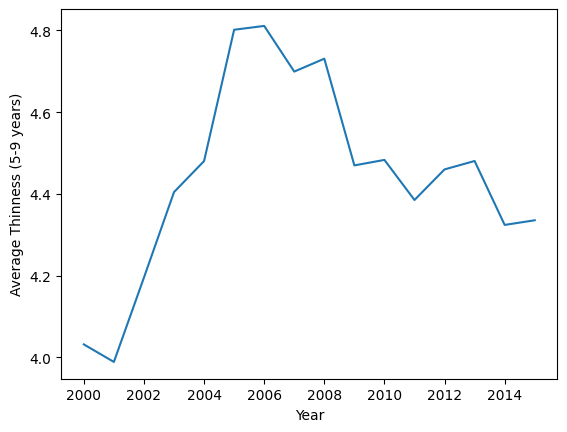

In [80]:
plt.plot(df.groupby('Year')[' thinness 5-9 years'].mean())
plt.xlabel('Year')
plt.ylabel('Average Thinness (5-9 years)')

#Generate a bar chart for the total number of measles cases in each Status.



<Axes: xlabel='Status'>

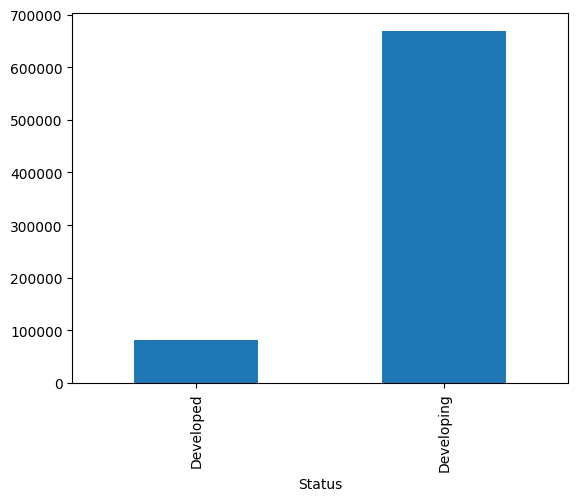

In [81]:
df.groupby('Status')['Measles '].sum().plot(kind='bar')


#Create a line chart to show the trend of HIV/AIDS prevalence over the years.



Text(0, 0.5, 'Average HIV/AIDS Prevalence')

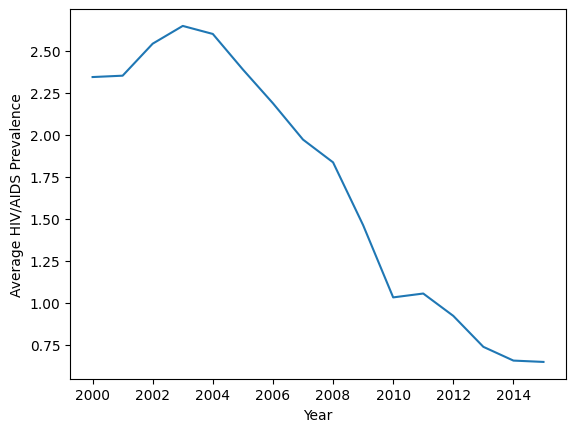

In [82]:
plt.plot(df.groupby('Year')[ ' HIV/AIDS'].mean())
plt.xlabel('Year')
plt.ylabel('Average HIV/AIDS Prevalence')

#Generate a bar chart for the total number of under-five deaths in each Status.



<Axes: xlabel='Status'>

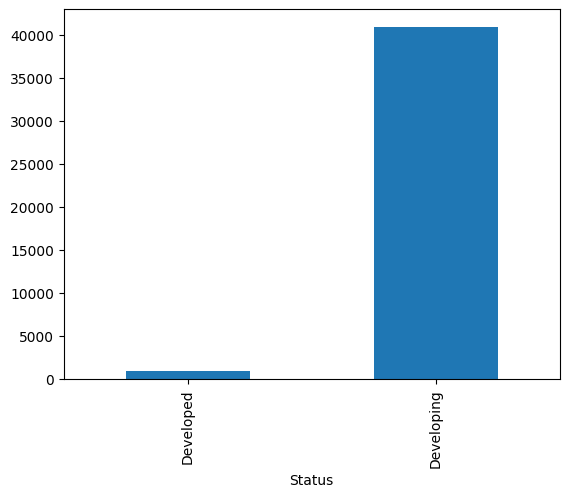

In [83]:
df.groupby('Status')['under-five deaths '].sum().plot(kind='bar')


#Create a line chart to show the trend of the number of measles cases over the years.



Text(0, 0.5, 'Total Measles Cases')

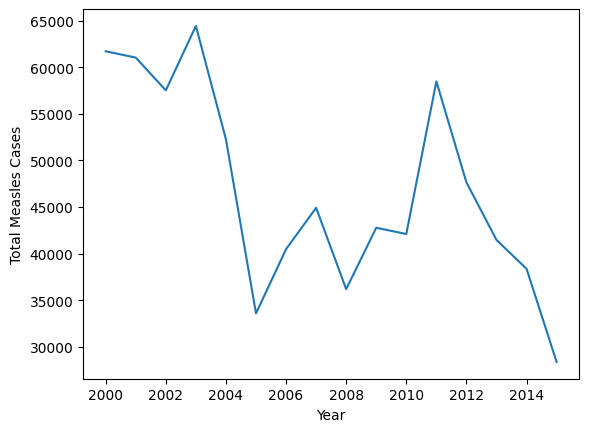

In [84]:
 plt.plot(df.groupby('Year')['Measles '].sum())
plt.xlabel('Year')
plt.ylabel('Total Measles Cases')

#Generate a bar chart for the average thinness (5-9 years) in each Status.



<Axes: xlabel='Status'>

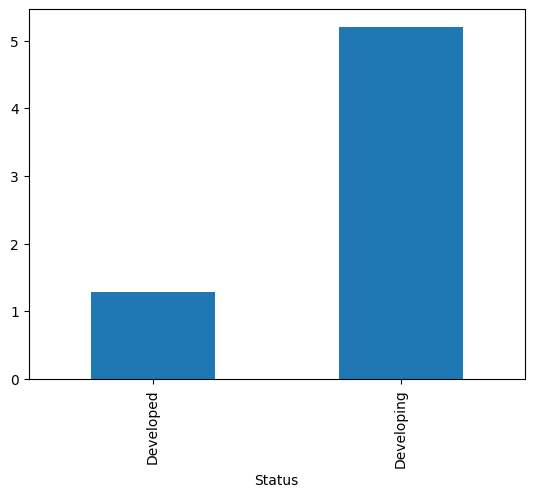

In [85]:
    df.groupby('Status')[' thinness 5-9 years'].mean().plot(kind='bar')


#Create a line chart to visualize the trend of Diphtheria vaccination coverage over the years.



Text(0, 0.5, 'Average Diphtheria Vaccination Coverage')

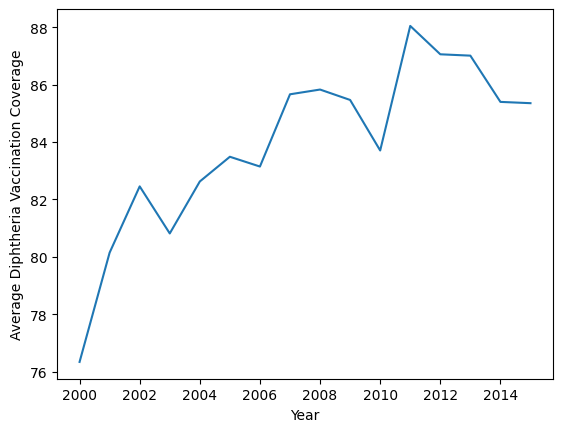

In [86]:
plt.plot(df.groupby('Year')['Diphtheria '].mean())
plt.xlabel('Year')
plt.ylabel('Average Diphtheria Vaccination Coverage')

#Create a line chart to visualize the trend of Hepatitis B vaccination coverage over the years.

Text(0, 0.5, 'Average Hepatitis B Vaccination Coverage')

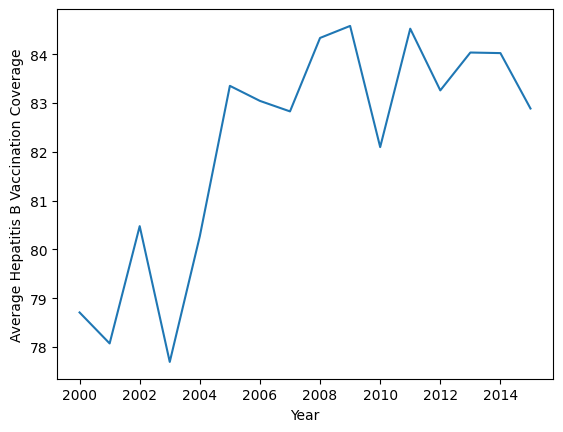

In [87]:
plt.plot(df.groupby('Year')['Hepatitis B'].mean())
plt.xlabel('Year')
plt.ylabel('Average Hepatitis B Vaccination Coverage')

#Generate a line chart to show the trend of infant deaths over the years.



Text(0, 0.5, 'Total Infant Deaths')

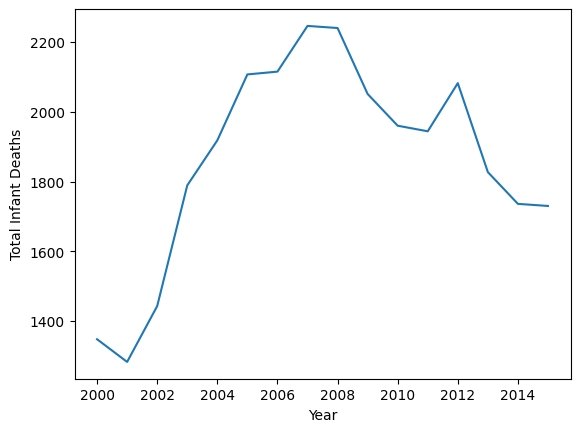

In [88]:
plt.plot(df.groupby('Year')['infant deaths'].sum())
plt.xlabel('Year')
plt.ylabel('Total Infant Deaths')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2610 entries, 0 to 2937
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                2610 non-null   object 
 1   Year                   2610 non-null   int64  
 2   Status                 2610 non-null   object 
 3   Life expectancy        2610 non-null   float64
 4   Adult Mortality        2610 non-null   float64
 5   infant deaths          2610 non-null   int64  
 6   Alcohol                2610 non-null   float64
 7   Hepatitis B            2610 non-null   float64
 8   Measles                2610 non-null   int64  
 9    BMI                   2610 non-null   float64
 10  under-five deaths      2610 non-null   int64  
 11  Polio                  2610 non-null   float64
 12  Diphtheria             2610 non-null   float64
 13   HIV/AIDS              2610 non-null   float64
 14   thinness  1-19 years  2610 non-null   float64
 15   thi

#Create a line chart to visualize the trend of alcohol consumption over the years.



Text(0, 0.5, 'Average Alcohol Consumption')

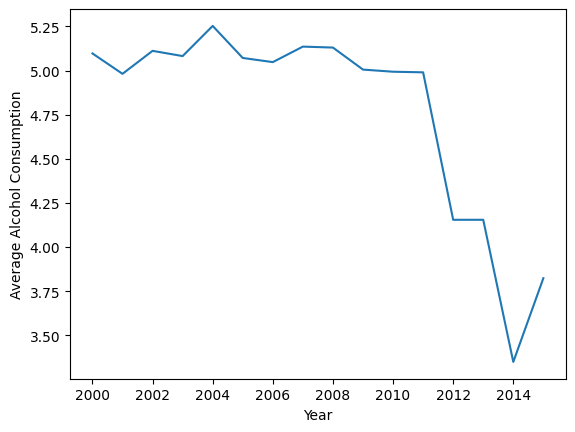

In [90]:
plt.plot(df.groupby('Year')['Alcohol'].mean())
plt.xlabel('Year')
plt.ylabel('Average Alcohol Consumption')

In [91]:
df = pd.get_dummies(df, columns=['Status'])
df

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Status_Developed,Status_Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,65.0,1154,19.1,83,6.0,65.0,0.1,17.2,17.3,0,1
1,Afghanistan,2014,59.9,271.0,64,0.01,62.0,492,18.6,86,58.0,62.0,0.1,17.5,17.5,0,1
2,Afghanistan,2013,59.9,268.0,66,0.01,64.0,430,18.1,89,62.0,64.0,0.1,17.7,17.7,0,1
3,Afghanistan,2012,59.5,272.0,69,0.01,67.0,2787,17.6,93,67.0,67.0,0.1,17.9,18.0,0,1
4,Afghanistan,2011,59.2,275.0,71,0.01,68.0,3013,17.2,97,68.0,68.0,0.1,18.2,18.2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,44.3,723.0,27,4.36,68.0,31,27.1,42,67.0,65.0,33.6,9.4,9.4,0,1
2934,Zimbabwe,2003,44.5,715.0,26,4.06,7.0,998,26.7,41,7.0,68.0,36.7,9.8,9.9,0,1
2935,Zimbabwe,2002,44.8,73.0,25,4.43,73.0,304,26.3,40,73.0,71.0,39.8,1.2,1.3,0,1
2936,Zimbabwe,2001,45.3,686.0,25,1.72,76.0,529,25.9,39,76.0,75.0,42.1,1.6,1.7,0,1


In [92]:
df.drop(['Country'], axis = 1,inplace=True)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2610 entries, 0 to 2937
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   2610 non-null   int64  
 1   Life expectancy        2610 non-null   float64
 2   Adult Mortality        2610 non-null   float64
 3   infant deaths          2610 non-null   int64  
 4   Alcohol                2610 non-null   float64
 5   Hepatitis B            2610 non-null   float64
 6   Measles                2610 non-null   int64  
 7    BMI                   2610 non-null   float64
 8   under-five deaths      2610 non-null   int64  
 9   Polio                  2610 non-null   float64
 10  Diphtheria             2610 non-null   float64
 11   HIV/AIDS              2610 non-null   float64
 12   thinness  1-19 years  2610 non-null   float64
 13   thinness 5-9 years    2610 non-null   float64
 14  Status_Developed       2610 non-null   uint8  
 15  Stat

In [94]:
x , y = df.drop(["Life expectancy ","Status_Developed","Status_Developing"] , axis = 1) , np.log(df['Life expectancy '])

In [95]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=0)

In [96]:
sclr = StandardScaler()

In [97]:
x_train = sclr.fit_transform(x_train)
x_test= sclr.transform(x_test)

In [98]:
from sklearn.linear_model import LinearRegression

LI=LinearRegression()
LI.fit(x_train, y_train)
print("Training set score: {:.2f}".format(LI.score(x_train, y_train)))
print("Test set score: {:.7f}".format(LI.score(x_test, y_test)))

Training set score: 0.78
Test set score: 0.7811333


In [99]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Random Forest Regressor', RandomForestRegressor()),
    ('XGBoost Regressor', XGBRegressor())
]

for model_name, model in models:
    print(model_name)

    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    print(f'Train Score: {r2_score(y_train, y_train_pred)}')
    print(f'Test Score: {r2_score(y_test, y_test_pred)}')
    print('-' * 30)


Linear Regression
Train Score: 0.7822510800806269
Test Score: 0.7811332988744483
------------------------------
Decision Tree Regressor
Train Score: 1.0
Test Score: 0.9135542449364797
------------------------------
Random Forest Regressor
Train Score: 0.9936664866388251
Test Score: 0.9443618381526491
------------------------------
XGBoost Regressor
Train Score: 0.9991837600541724
Test Score: 0.9410330842006489
------------------------------


In [100]:
pl=make_pipeline(StandardScaler(),RandomForestRegressor())
pl

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [101]:
import joblib
scaler=StandardScaler()
joblib.dump(scaler, 'scaler.h5')
model=LI
joblib.dump(LI, 'Final.h5')


['Final.h5']